### Analyze Helpdesk tickets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import RobustScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [4]:
tickets = pd.read_csv("C:/Users/HP/Desktop/tickets/WA_Fn-UseC_-IT-Help-Desk.csv")

In [5]:
tickets.columns

Index(['ticket', 'requestor', 'RequestorSeniority', 'ITOwner', 'FiledAgainst',
       'TicketType', 'Severity', 'Priority', 'daysOpen', 'Satisfaction'],
      dtype='object')

In [6]:
tickets = tickets[['ticket', 'requestor', 'RequestorSeniority', 'ITOwner', 'FiledAgainst',
       'TicketType', 'Priority', 'daysOpen', 'Satisfaction']]

In [7]:
tickets.head(3)

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Priority,daysOpen,Satisfaction
0,1,1929,1 - Junior,50,Systems,Issue,0 - Unassigned,3,1 - Unsatisfied
1,2,1587,2 - Regular,15,Software,Request,1 - Low,5,1 - Unsatisfied
2,3,925,2 - Regular,15,Access/Login,Request,0 - Unassigned,0,0 - Unknown


#### Exploratory Data Science

In [8]:
tickets.shape

(100000, 9)

In [9]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ticket              100000 non-null  int64 
 1   requestor           100000 non-null  int64 
 2   RequestorSeniority  100000 non-null  object
 3   ITOwner             100000 non-null  int64 
 4   FiledAgainst        100000 non-null  object
 5   TicketType          100000 non-null  object
 6   Priority            100000 non-null  object
 7   daysOpen            100000 non-null  int64 
 8   Satisfaction        100000 non-null  object
dtypes: int64(4), object(5)
memory usage: 6.9+ MB


In [10]:
train, test = train_test_split(tickets, test_size=0.25, random_state=42, shuffle=True)

### Missing Value Imputation

In [11]:
train.size, test.size

(675000, 225000)

In [12]:
tickets.isnull().sum()

ticket                0
requestor             0
RequestorSeniority    0
ITOwner               0
FiledAgainst          0
TicketType            0
Priority              0
daysOpen              0
Satisfaction          0
dtype: int64

In [13]:
print(tickets.isnull().sum()/tickets.shape[0] *100)

ticket                0.0
requestor             0.0
RequestorSeniority    0.0
ITOwner               0.0
FiledAgainst          0.0
TicketType            0.0
Priority              0.0
daysOpen              0.0
Satisfaction          0.0
dtype: float64


In [14]:
tickets.Satisfaction.value_counts()

0 - Unknown             30211
3 - Highly satisfied    29063
1 - Unsatisfied         21124
2 - Satisfied           19602
Name: Satisfaction, dtype: int64

In [15]:
tickets.Satisfaction = tickets.Satisfaction.astype('category').cat.codes

In [16]:
tickets.head(2)

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Priority,daysOpen,Satisfaction
0,1,1929,1 - Junior,50,Systems,Issue,0 - Unassigned,3,1
1,2,1587,2 - Regular,15,Software,Request,1 - Low,5,1


In [17]:
tickets.Priority = tickets.Priority.astype('category').cat.codes
# tickets.Severity = tickets.Severity.astype('category').cat.codes
tickets.TicketType = tickets.TicketType.astype('category').cat.codes
tickets.FiledAgainst = tickets.FiledAgainst.astype('category').cat.codes
tickets.RequestorSeniority = tickets.RequestorSeniority.astype('category').cat.codes


### Scaling

In [18]:
tickets.dtypes

ticket                int64
requestor             int64
RequestorSeniority     int8
ITOwner               int64
FiledAgainst           int8
TicketType             int8
Priority               int8
daysOpen              int64
Satisfaction           int8
dtype: object

In [19]:
#lets import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import sklearn.datasets as dts
import matplotlib.pyplot as plt
from itertools import permutations
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler

In [20]:
X = (tickets.drop(columns=tickets[['Priority']],axis=0)).values
Y = (tickets.iloc[:,-1:]).values

In [21]:
print(X.shape, Y.shape)

(100000, 8) (100000, 1)


In [22]:
scaler =StandardScaler()
X=scaler.fit_transform(X)

In [23]:
X  = pd.DataFrame(X)

#### Gaussian Or Normalized 

In [24]:
import scipy.stats as stat
import pylab 

In [25]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

In [26]:
X.head(3)

,0,1,2,3,4,5,6,7
0,-1.732033,1.610322,-1.361357,1.698449,1.023391,-1.735475,-0.520861,-0.396683
1,-1.731999,1.018120,-0.378236,-0.724050,0.234851,0.576211,-0.249779,-0.396683
2,-1.731964,-0.128191,-0.378236,-0.724050,-1.342229,0.576211,-0.927484,-1.231507


In [27]:
X.rename(columns={0:"ticket",
1:"requestor", 2:"RequestorSeniority", 3:"ITOwner", 4:"FiledAgainst", 5:"TicketType",
6:"Severity", 7:"daysOpen", 8:"Satisfaction"}, inplace=True)

In [28]:
X.head(2)

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,daysOpen
0,-1.732033,1.610322,-1.361357,1.698449,1.023391,-1.735475,-0.520861,-0.396683
1,-1.731999,1.018120,-0.378236,-0.724050,0.234851,0.576211,-0.249779,-0.396683


In [29]:
X.columns

Index(['ticket', 'requestor', 'RequestorSeniority', 'ITOwner', 'FiledAgainst',
       'TicketType', 'Severity', 'daysOpen'],
      dtype='object')

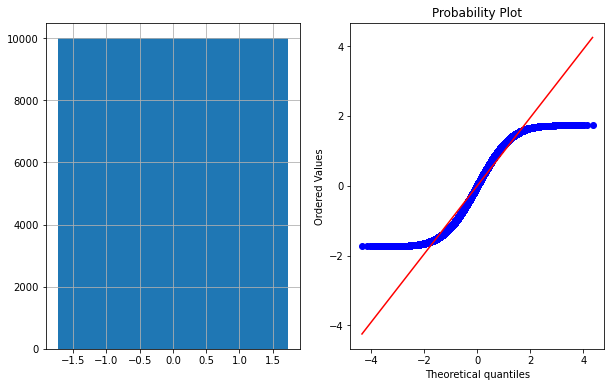

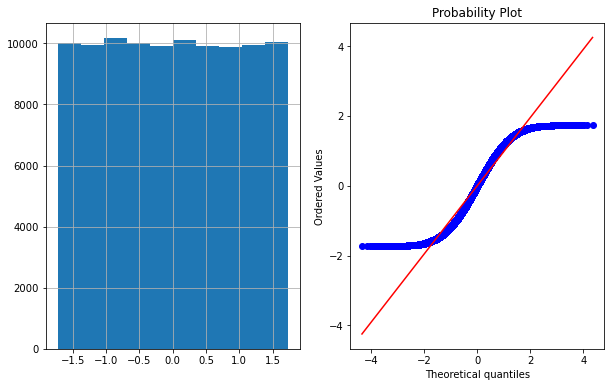

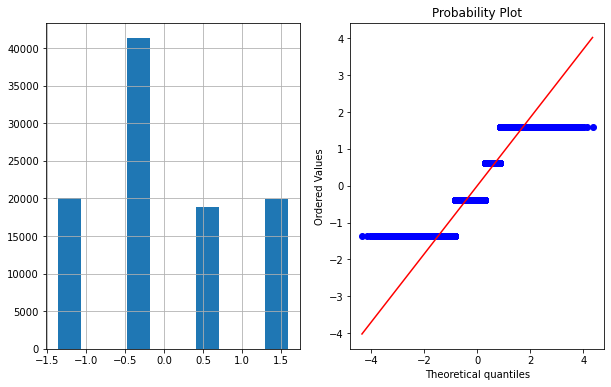

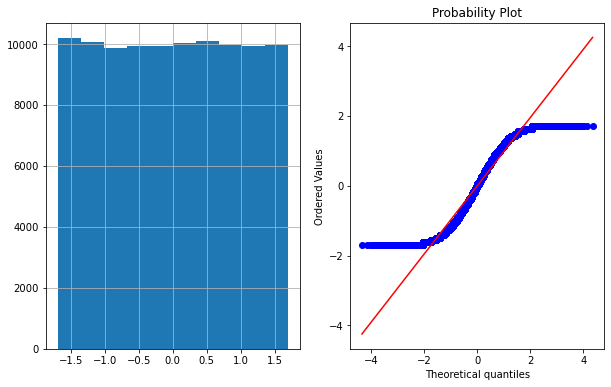

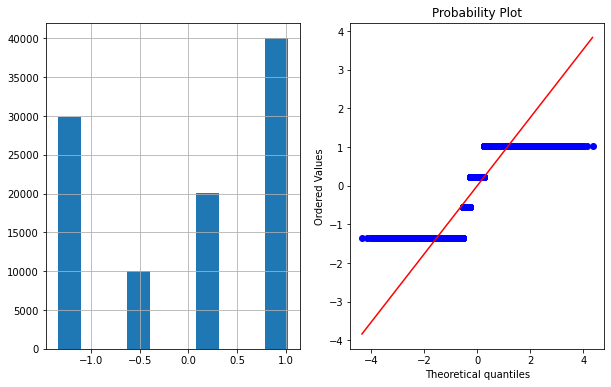

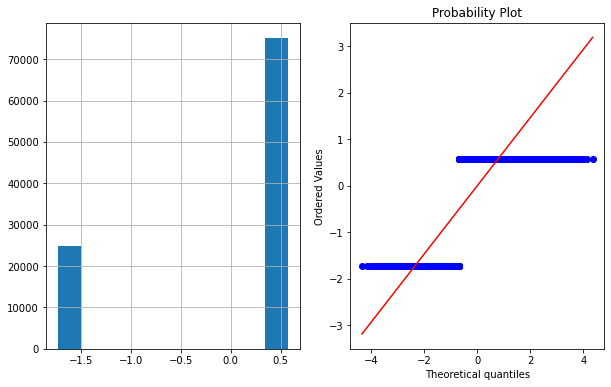

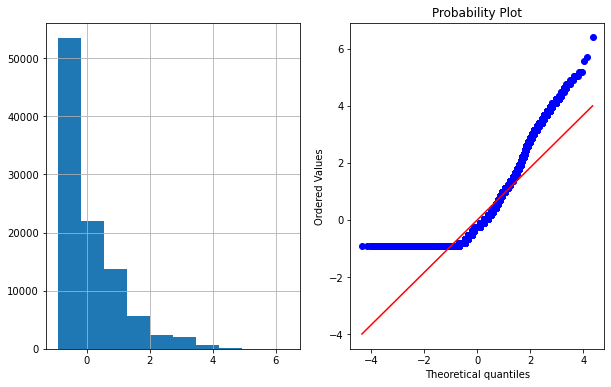

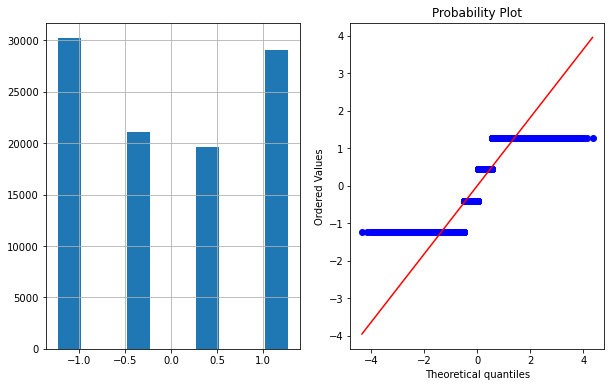

In [30]:
plot_data(X,'ticket')
plot_data(X,'requestor')
plot_data(X,'RequestorSeniority')
plot_data(X, 'ITOwner')
plot_data(X, 'FiledAgainst')
plot_data(X, 'TicketType')
plot_data(X, 'Severity')
plot_data(X, 'daysOpen')
## plot_data(X, 'Satisfaction')


In [31]:
Y = pd.DataFrame(Y)

In [32]:
Y.rename(columns={0:"Priority"}, inplace=True)

In [33]:
Y.value_counts()

Priority
0           30211
3           29063
1           21124
2           19602
dtype: int64

### Feature Selection

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

In [35]:
Ext = ExtraTreesClassifier()
Ext.fit(X,Y)

ExtraTreesClassifier()

In [36]:
print(Ext.feature_importances_)

[6.77168527e-03 6.93123866e-03 1.82007957e-03 9.69527993e-03
 1.68249329e-03 6.29223753e-04 6.81888644e-03 9.65651113e-01]


<AxesSubplot:>

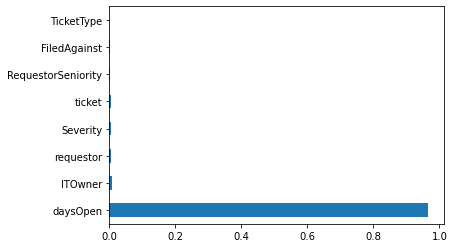

In [37]:
feature = pd.Series(Ext.feature_importances_,index=X.columns)
feature.sort_values(ascending=True).nlargest(15).plot(kind='barh')

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [39]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(75000, 8) (25000, 8) (75000, 1) (25000, 1)


### Correlation - To Check `Multicollinearity`

In [40]:
X_train.corr()

,ticket,requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,daysOpen
ticket,1.000000,0.001995,0.002746,-0.000125,0.002924,-0.001218,0.001929,0.009040
requestor,0.001995,1.000000,-0.026898,-0.000664,-0.006143,0.002355,-0.000456,0.008615
RequestorSeniority,0.002746,-0.026898,1.000000,-0.005099,-0.003313,0.008534,-0.091305,0.008669
ITOwner,-0.000125,-0.000664,-0.005099,1.000000,-0.003295,-0.000807,-0.046127,0.020153
FiledAgainst,0.002924,-0.006143,-0.003313,-0.003295,1.000000,-0.002498,0.425029,-0.003273
TicketType,-0.001218,0.002355,0.008534,-0.000807,-0.002498,1.000000,0.245015,0.002988
Severity,0.001929,-0.000456,-0.091305,-0.046127,0.425029,0.245015,1.000000,-0.066719
daysOpen,0.009040,0.008615,0.008669,0.020153,-0.003273,0.002988,-0.066719,1.000000


<AxesSubplot:>

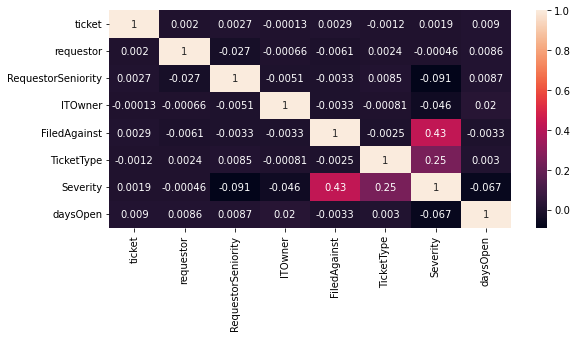

In [41]:
import seaborn as sns
corr=X_train.corr()
top_features=corr.index
plt.figure(figsize=(9,4))
sns.heatmap(X_train[top_features].corr(),annot=True)


In [42]:
threshold=0.7

In [43]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [44]:
correlation(X_train,threshold)

set()

#### Pipeline Creation

In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
##from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [46]:
pipeline_lr=Pipeline([('scalar1',RobustScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [47]:
pipeline_dt=Pipeline([('scalar2',RobustScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [48]:
pipeline_randomforest=Pipeline([('scalar3',RobustScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [49]:
pipeline_gradient_boost=Pipeline([('scalar4',RobustScaler()),
                     ('pca4',PCA(n_components=2)),
                     ('gb_classifier',GradientBoostingClassifier())])

In [50]:
pipeline_Adaboost=Pipeline([('scalar5',RobustScaler()),
                          ('pca5',PCA(n_components=2)),
                          ('xgb_classifier',AdaBoostClassifier())])

In [51]:
pipeline_knn=Pipeline([('scalar6',RobustScaler()),
                          ('pca6',PCA(n_components=2)),
                          ('knn_classifier',KNeighborsClassifier())])

In [52]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_gradient_boost,pipeline_Adaboost, pipeline_knn]

In [53]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

#### For `Target` Label Category

In [54]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: 'Gradient Boost', 4: 'Ada Boost', 5: 'KNN'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train,Y_train["Priority"])

In [55]:
for i,model in enumerate(pipelines):
    print("{} Accuracy: {}".format(pipe_dict[i],model.score(X_train,Y_train["Priority"])))

Logistic Regression Accuracy: 0.30964
Decision Tree Accuracy: 1.0
RandomForest Accuracy: 0.9999866666666667
Gradient Boost Accuracy: 0.36012
Ada Boost Accuracy: 0.34037333333333336
KNN Accuracy: 0.54956


#### Hyper Parameter Tuning

In [56]:
gradient_grid = {
               'max_depth': [8, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 150, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [10, 20, 40, 50, 60, 70, 80, 90],
               'min_samples_split': [200, 500, 800, 1000]
               }

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gb_random = RandomizedSearchCV(estimator = gb, 
                               param_distributions = gradient_grid, 
                               n_iter = 2, 
                               cv =2, 
                               verbose=2, 
                               random_state=42)


In [59]:
# Fit the random search model
gb_random.fit(X_train, Y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=800; total time=  31.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=800; total time=  34.5s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=60, min_samples_split=1000; total time=  38.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=60, min_samples_split=1000; total time=  36.9s


RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_iter=2,
                   param_distributions={'max_depth': [8, 10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      150, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [10, 20, 40, 50, 60,
                                                             70, 80, 90],
                                        'min_samples_split': [200, 500, 800,
                                                              1000]},
                   random_state=42, verbose=2)

In [60]:
gb_random.best_params_

{'min_samples_split': 800,
 'min_samples_leaf': 20,
 'max_features': 'sqrt',
 'max_depth': 10}

In [61]:
best_random_grid=gb_random.best_estimator_

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred_random=best_random_grid.predict(X_test)


In [63]:
print(classification_report(Y_test, y_pred_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7598
           1       1.00      1.00      1.00      5278
           2       1.00      1.00      1.00      4783
           3       1.00      1.00      1.00      7341

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000



### Grid Search

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_samples_split': [gb_random.best_params_['min_samples_split'] - 40, 
    gb_random.best_params_['min_samples_split'], 
    gb_random.best_params_['min_samples_split'] + 40], 

    'min_samples_leaf': [gb_random.best_params_['min_samples_leaf'] - 10, 
    gb_random.best_params_['min_samples_leaf'], 
    gb_random.best_params_['min_samples_leaf'] + 10], 

    'max_features': [gb_random.best_params_['max_features']],

    'max_depth': [gb_random.best_params_['max_depth'] - 10,
    gb_random.best_params_['max_depth'],
    gb_random.best_params_['max_depth'] + 10 ]                                                                                            
}

print(param_grid)

{'min_samples_split': [760, 800, 840], 'min_samples_leaf': [10, 20, 30], 'max_features': ['sqrt'], 'max_depth': [0, 10, 20]}


In [65]:
grid_search=GridSearchCV(estimator=best_random_grid,param_grid=param_grid,cv=3,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=0, max_features=sqrt, min_samples_leaf=10, min_samples_split=760; total time=   0.0s
[CV] END max_depth=0, max_features=sqrt, min_samples_leaf=10, min_samples_split=760; total time=   0.0s
[CV] END max_depth=0, max_features=sqrt, min_samples_leaf=10, min_samples_split=760; total time=   0.0s
[CV] END max_depth=0, max_features=sqrt, min_samples_leaf=10, min_samples_split=800; total time=   0.0s
[CV] END max_depth=0, max_features=sqrt, min_samples_leaf=10, min_samples_split=800; total time=   0.0s
[CV] END max_depth=0, max_features=sqrt, min_samples_leaf=10, min_samples_split=800; total time=   0.0s
[CV] END max_depth=0, max_features=sqrt, min_samples_leaf=10, min_samples_split=840; total time=   0.0s
[CV] END max_depth=0, max_features=sqrt, min_samples_leaf=10, min_samples_split=840; total time=   0.0s
[CV] END max_depth=0, max_features=sqrt, min_samples_leaf=10, min_samples_split=840; total time=   0.0s
[CV

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=10,
                                                  max_features='sqrt',
                                                  min_samples_leaf=20,
                                                  min_samples_split=800),
             param_grid={'max_depth': [0, 10, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [760, 800, 840]},
             verbose=2)

In [66]:
grid_search.best_estimator_

GradientBoostingClassifier(max_depth=10, max_features='sqrt',
                           min_samples_leaf=10, min_samples_split=760)

In [67]:
best_grid=grid_search.best_estimator_

In [68]:
print(best_grid)

GradientBoostingClassifier(max_depth=10, max_features='sqrt',
                           min_samples_leaf=10, min_samples_split=760)


In [69]:
y_pred_grid=best_grid.predict(X_test)

In [70]:
y_pred_grid=pd.DataFrame(y_pred_grid)

#### Classification Report 

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [72]:
print(classification_report(Y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7598
           1       1.00      1.00      1.00      5278
           2       1.00      1.00      1.00      4783
           3       1.00      1.00      1.00      7341

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000



In [73]:
print(y_pred_grid.value_counts())

0    7598
3    7341
1    5278
2    4783
dtype: int64


In [74]:
y_pred_grid.rename(columns={0:"Predict_grid"}, inplace=True)

In [75]:
y_pred_random = pd.DataFrame(y_pred_random)
print(y_pred_random.value_counts())

0    7598
3    7341
1    5278
2    4783
dtype: int64


In [76]:
y_pred_random.rename(columns={0:"Predict_random"}, inplace=True)

In [77]:
print(X_test.shape, y_pred_grid.shape)

(25000, 8) (25000, 1)


In [78]:
y_pred_grid = pd.DataFrame(y_pred_grid)

In [79]:
y_pred_grid.value_counts()

Predict_grid
0               7598
3               7341
1               5278
2               4783
dtype: int64

In [80]:
y_pred_random.value_counts()

Predict_random
0                 7598
3                 7341
1                 5278
2                 4783
dtype: int64

In [81]:
print(confusion_matrix(Y_test, y_pred_grid))

[[7598    0    0    0]
 [   0 5278    0    0]
 [   0    0 4783    0]
 [   0    0    0 7341]]


In [82]:
print(confusion_matrix(Y_test, y_pred_random))

[[7598    0    0    0]
 [   0 5278    0    0]
 [   0    0 4783    0]
 [   0    0    0 7341]]


In [83]:
c = test.Priority.astype('category')
d = dict(enumerate(c.cat.categories))

In [84]:
print(d)

{0: '0 - Unassigned', 1: '1 - Low', 2: '2 - Medium', 3: '3 - High'}


In [85]:
y_pred_grid = y_pred_grid["Predict_grid"].map(d)

In [86]:
y_pred_grid.value_counts()


0 - Unassigned    7598
3 - High          7341
1 - Low           5278
2 - Medium        4783
Name: Predict_grid, dtype: int64

In [87]:
y_pred_random = y_pred_random["Predict_random"].map(d)

In [88]:
y_pred_random.value_counts()

0 - Unassigned    7598
3 - High          7341
1 - Low           5278
2 - Medium        4783
Name: Predict_random, dtype: int64

In [89]:
y_pred_random = pd.DataFrame(y_pred_random)

In [90]:
y_pred_random.value_counts()

Predict_random
0 - Unassigned    7598
3 - High          7341
1 - Low           5278
2 - Medium        4783
dtype: int64

In [91]:
bw = y_pred_random.value_counts()

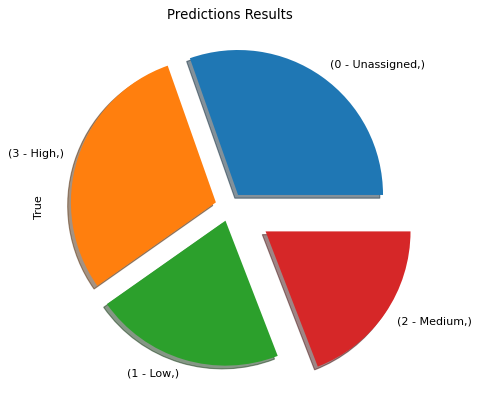

In [92]:
plt.figure(figsize=(10,6), dpi=80, facecolor='white')
explode=(0.1, 0.1, 0.1, 0.3)
bw.plot.pie(shadow=True, explode=explode, label=True)
plt.title("Predictions Results")
plt.show()

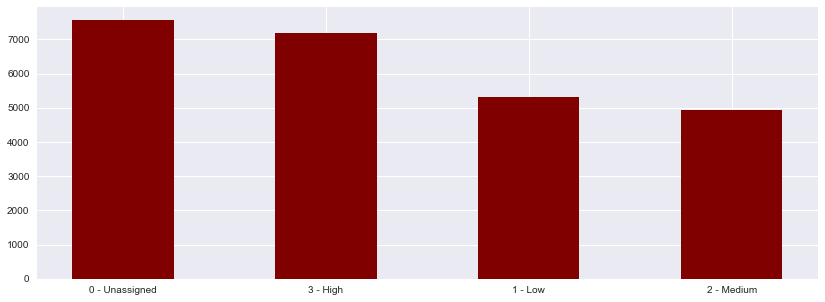

In [93]:
dict = { 
'0 - Unassigned' :   7566,
'3 - High'       :   7184,
'1 - Low'        :   5318,
'2 - Medium'     :   4932
}

names = list(dict.keys())
values = list(dict.values())

fig = plt.figure(figsize = (14, 5))

plt.style.use("seaborn")
# creating the bar plot
plt.bar(names, values, color ='maroon', width = 0.5)
plt.show()


### Optuna

In [ ]:
###! pip install optuna

In [98]:
import optuna
import sklearn

In [99]:
param_grid_optuna = {
    "bootstrap": [True, False],
    "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    "max_features": ['auto', 'sqrt'],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 5, 10, 15],
    "n_estimators": [200, 400, 600, 800, 1000, 1200, 1300, 1500]
}

In [100]:
from sklearn.model_selection import cross_val_score

In [103]:
def objective(trial):
    bootstrap = trial.suggest_categorical('bootstrap',[True, False])
    max_depth = trial.suggest_int('max_depth', 10, 100)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt'])
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    n_estimators =  trial.suggest_int('n_estimators', 200, 1500)
    
    clsr = RandomForestClassifier(bootstrap = bootstrap,
                                 max_depth = max_depth, max_features = max_features,min_samples_leaf = min_samples_leaf,
                                 min_samples_split = min_samples_split,n_estimators = n_estimators)
    
    
    #regr.fit(X_train, y_train)
    #y_pred = regr.predict(X_val)
    #return r2_score(y_val, y_pred)
    
    score = cross_val_score(clsr, X_train, Y_train, cv=5)
    meanvalue = score.mean()

    return meanvalue

In [104]:
#Execute optuna and set hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)

[I 2022-11-24 20:25:14,645] A new study created in memory with name: no-name-8495e566-ed79-4280-8be4-bd215377effe
[I 2022-11-24 20:31:37,018] Trial 0 finished with value: 0.9999866666666666 and parameters: {'bootstrap': True, 'max_depth': 91, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 13, 'n_estimators': 859}. Best is trial 0 with value: 0.9999866666666666.
[I 2022-11-24 20:35:26,370] Trial 1 finished with value: 0.9999733333333334 and parameters: {'bootstrap': False, 'max_depth': 77, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 475}. Best is trial 0 with value: 0.9999866666666666.
[I 2022-11-24 20:41:39,434] Trial 2 finished with value: 0.9999866666666666 and parameters: {'bootstrap': True, 'max_depth': 71, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 1125}. Best is trial 0 with value: 0.9999866666666666.
[I 2022-11-24 20:45:16,201] Trial 3 finished with value: 1.0 and paramet

In [105]:
#Create an instance with tuned hyperparameters
optimised_rf_optuna = RandomForestClassifier(bootstrap = study.best_params['bootstrap'],
                                     max_depth = study.best_params['max_depth'], max_features = study.best_params['max_features'],
                                     min_samples_leaf = study.best_params['min_samples_leaf'],
                                     min_samples_split = study.best_params['min_samples_split'],
                                     n_estimators = study.best_params['n_estimators'])
#learn
optimised_rf_optuna.fit(X_train ,Y_train)

RandomForestClassifier(max_depth=21, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=6, n_estimators=741)

In [ ]:
y_pred_optuna = optimised_rf_optuna.predict(X_test)

In [ ]:
print('Baseline: Accuracy: ', round(accuracy_score(Y_test, y_pred_optuna)*100, 2))
print('\n Classification Report:\n', classification_report(Y_test,y_pred_optuna))

In [ ]:
y_pred_optuna = y_pred_optuna.rename(columns ={0: "Predicted Genre"} )